# Визуализация Продолжительность жизни

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegFileWriter
import matplotlib.font_manager
from IPython.display import HTML

In [2]:
import matplotlib.cbook as cbook

In [3]:
df = pd.read_csv(r'C:\Users\emo.DESKTOP-NBUNK0A\Documents\Data science\Datasets\life-expectancy.csv')

In [4]:
df.head()

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350


In [5]:
df['Life expectancy'].describe()

count    19028.000000
mean        61.751767
std         13.091632
min         17.760000
25%         52.314750
50%         64.713000
75%         71.984250
max         86.751000
Name: Life expectancy, dtype: float64

In [6]:
df_renew = df.pivot_table(index='Year', columns='Entity', values='Life expectancy').reset_index()
df_renew.head()

Entity,Year,Afghanistan,Africa,Albania,Algeria,American Samoa,Americas,Andorra,Angola,Anguilla,...,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,World,Yemen,Zambia,Zimbabwe
0,1543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_new = df_renew.query('Year > 1920').reset_index()

In [8]:
df_new

Entity,index,Year,Afghanistan,Africa,Albania,Algeria,American Samoa,Americas,Andorra,Angola,...,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,World,Yemen,Zambia,Zimbabwe
0,212,1921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,213,1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,214,1923,NaN,NaN,NaN,28.822399,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215,1924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,216,1925,NaN,26.400,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,306,2015,63.377,61.607,78.025,76.090000,73.588,76.442865,83.073,59.398,...,69.869,74.344,72.584,75.110,79.300,69.213,71.661,66.085,61.737,59.534
95,307,2016,63.763,62.064,78.194,76.298000,73.609,76.537039,83.274,59.925,...,70.021,74.551,72.405,75.172,79.454,69.496,71.928,66.087,62.464,60.294
96,308,2017,64.130,62.472,78.333,76.499000,73.636,76.629931,83.443,60.379,...,70.172,74.749,72.246,75.241,79.605,69.762,72.169,66.086,63.043,60.812
97,309,2018,64.486,62.839,78.458,76.693000,73.679,76.728427,83.594,60.782,...,70.323,74.940,72.128,75.317,79.767,70.017,72.386,66.096,63.510,61.195


In [9]:
df_renew['Afghanistan']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
306    63.377
307    63.763
308    64.130
309    64.486
310    64.833
Name: Afghanistan, Length: 311, dtype: float64

In [10]:
kz_color = '#18B1FF'
ru_color = '#009900'
afg_color = '#FF9818'
ca_color = '#FC2222'
nw_color = '#0019C7'
turk_color = '#DA18FF'
lw = 2     # ширина линии

In [11]:
# Задаим размеры шрифтов для подписей графиков
title_fs = 23
legend_fs = 10
axis_title_fs = 18
ticks_fs = 12

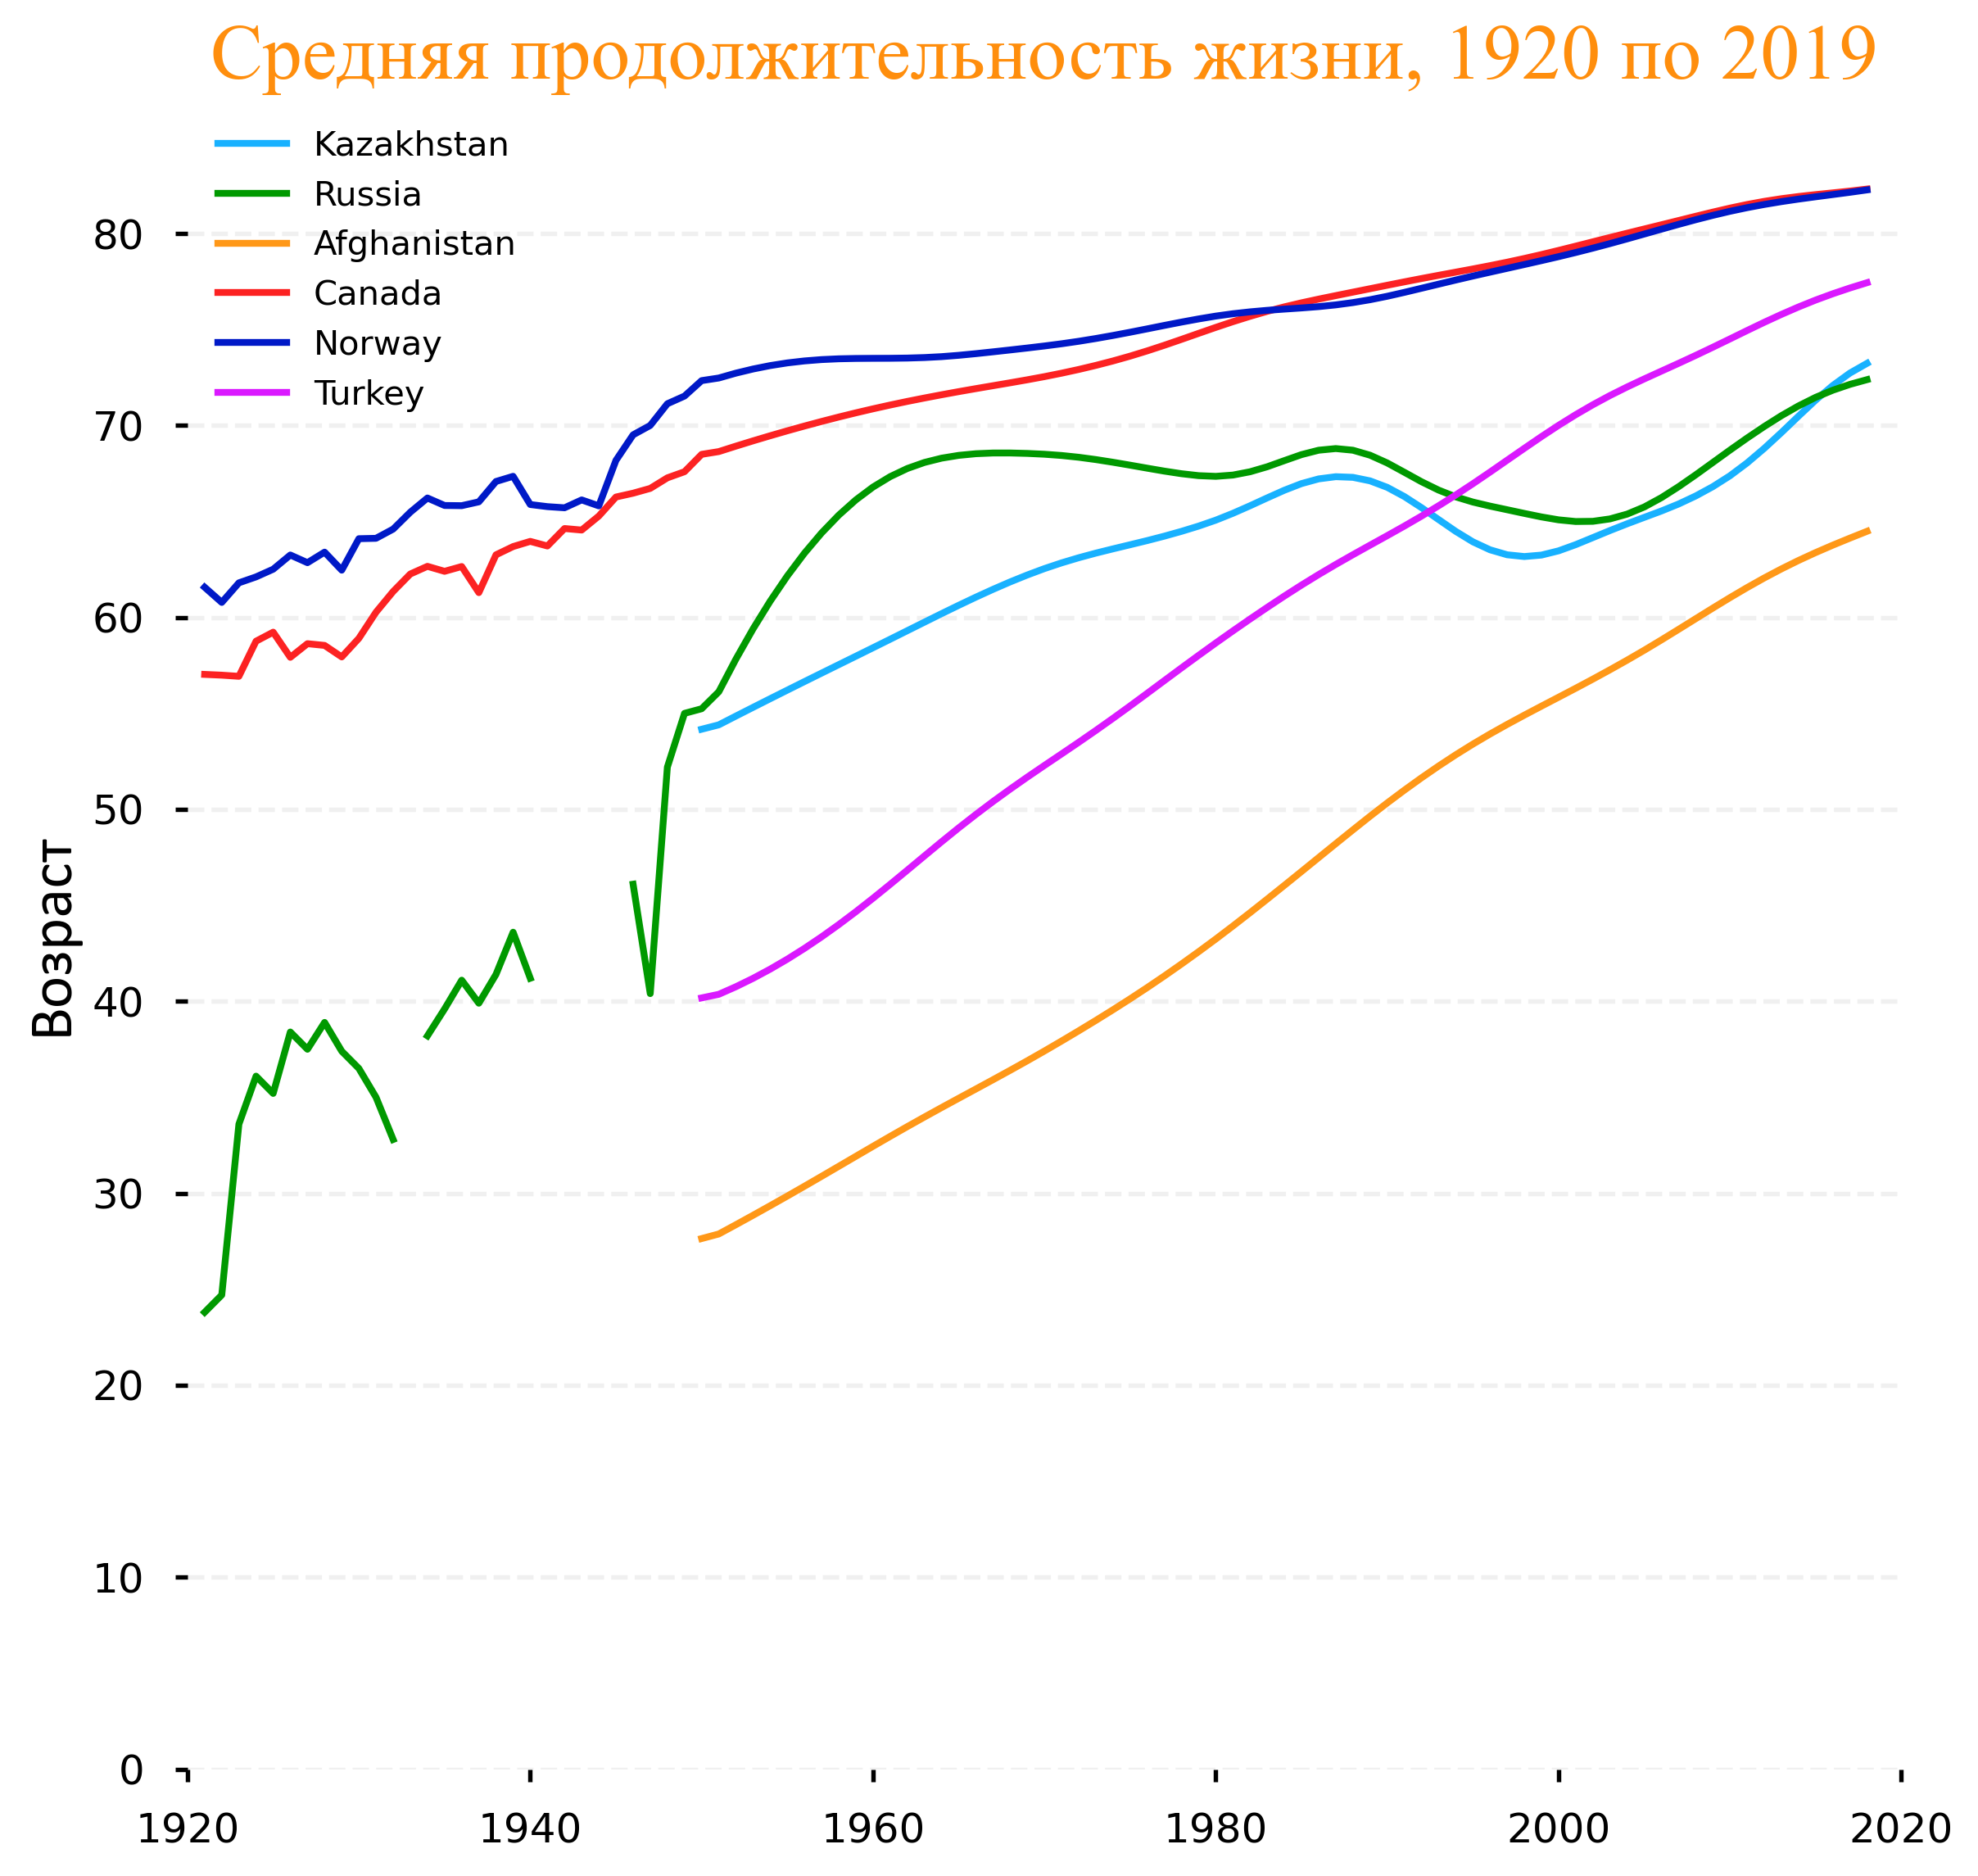

In [15]:
plt.style.use('seaborn-talk')
fig, ax = plt.subplots(figsize=(9,9), dpi=300) #dpi оставить если график сохраняется в видео, а если смотреть как jshtml dpi убрать
xdata, ydata_kz, ydata_ru, ydata_afg, ydata_ca, ydata_nw, ydata_turk = [], [], [], [], [], [], []
ln_kz, = plt.plot([], [], kz_color, animated=True, label='Kazakhstan', linewidth=lw)
ln_ru, = plt.plot([], [], ru_color, animated=True, label='Russia', linewidth=lw)
ln_afg, = plt.plot([], [], afg_color, animated=True, label='Afghanistan', linewidth=lw)
ln_ca, = plt.plot([], [], ca_color, animated=True, label='Canada',linewidth=lw)
ln_nw, = plt.plot([], [], nw_color, animated=True, label='Norway', linewidth=lw)
ln_turk, = plt.plot([], [], turk_color, animated=True, label='Turkey', linewidth=lw)

f = range(0, 98, 1)


def init():
    ax.set_xlim(1920, 2020)
    ax.set_ylim(0, 87)
    ax.grid(which='major', axis='y', alpha=0.18, ls='--')
    ln_kz.set_data(xdata,ydata_kz)
    ln_ru.set_data(xdata,ydata_ru)
    ln_afg.set_data(xdata,ydata_afg)
    ln_ca.set_data(xdata,ydata_ca)
    ln_nw.set_data(xdata,ydata_nw)
    ln_turk.set_data(xdata,ydata_turk)
    ax.set_title(label='''Средняя продолжительность жизни, 1920 по 2019''', fontsize=title_fs, 
                 fontname='Times New Roman', color='#FF8E0D')

    ax.set_ylabel("Возраст",fontname='Calibri',loc='center', fontsize=axis_title_fs)
    
    plt.xticks(fontsize=ticks_fs)
    plt.yticks(fontsize=ticks_fs)
    
    for s in ['top', 'right', 'left', 'bottom']:
        ax.spines[s].set_visible(False)
        
    L = ax.legend(frameon=False,loc='upper left', ncol= 1, fontsize=legend_fs)
    L.get_frame().set_facecolor('none')
    return ln_kz, ln_ru, ln_afg, ln_ca, ln_nw, ln_turk

def update(frame):
    xdata.append(df_new['Year'][frame])
    ydata_kz.append(df_new['Kazakhstan'][frame])
    ydata_ru.append(df_new['Russia'][frame])
    ydata_afg.append(df_new['Afghanistan'][frame])
    ydata_ca.append(df_new['Canada'][frame])
    ydata_nw.append(df_new['Norway'][frame])
    ydata_turk.append(df_new['Turkey'][frame])
    ln_kz.set_data(xdata, ydata_kz)
    ln_ru.set_data(xdata, ydata_ru)
    ln_afg.set_data(xdata, ydata_afg)
    ln_ca.set_data(xdata, ydata_ca)
    ln_nw.set_data(xdata, ydata_nw)
    ln_turk.set_data(xdata, ydata_turk)
    return ln_ru, ln_kz, ln_afg, ln_ca, ln_nw, ln_turk

ani = FuncAnimation(fig, update, frames=f, init_func=init, blit=False, interval=1000, repeat=False)

# Сохранить как mp4
ani.save(r'C:\Users\emo.DESKTOP-NBUNK0A\Documents\Data science\Datasets\Vizualizations\Life_ex_light_close.mp4', writer='ffmpeg', fps=4, bitrate=10000)
#plt.show()
# Показать и сохранить как html
# HTML(ani.to_html5_video())
# Показать как jshtml
# HTML(ani.to_jshtml())